In [37]:
pip install -U scikit-learn xgboost shap

In [38]:
# Import necessary libraries
import pandas as pd
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import PartialDependenceDisplay
from sklearn import tree

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/tugasxgboost.csv')
# Tampilkan nama kolom dataset
print(df.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'Class'],
      dtype='object')


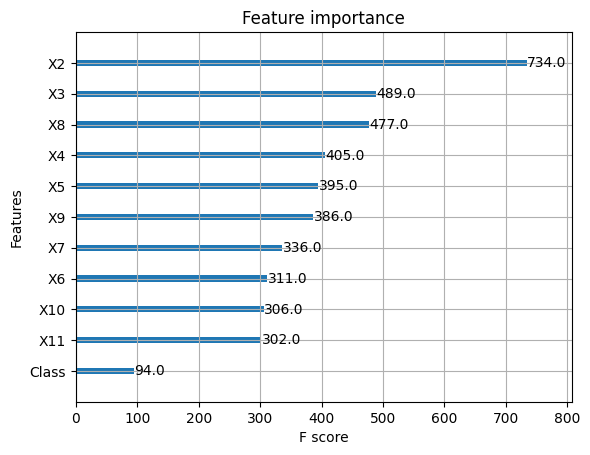

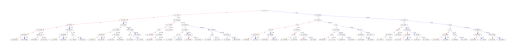

<Figure size 2000x1000 with 0 Axes>

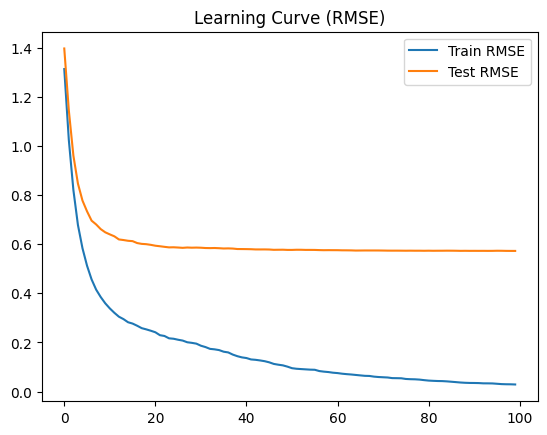

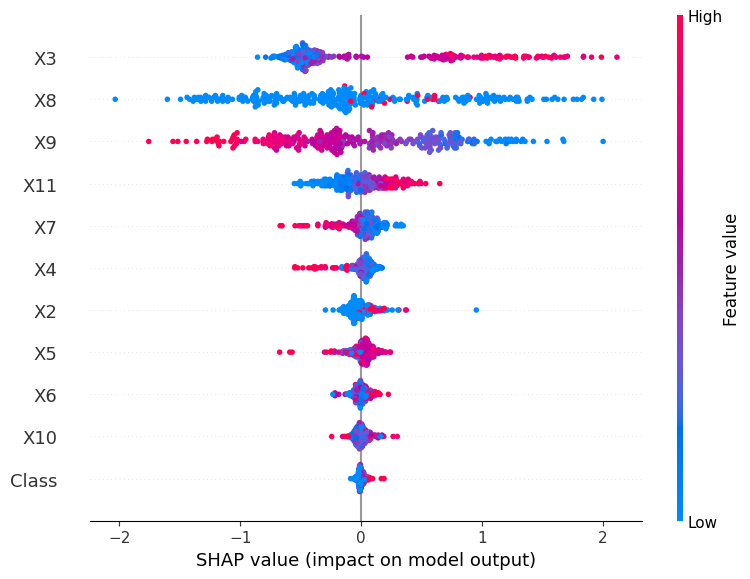

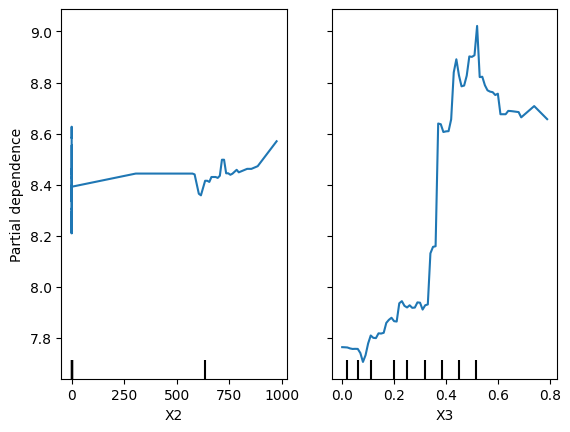

In [39]:
# Assume target column is 'target' and features are the rest
X = df.drop('X1', axis=1)
y = df['X1']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
xg_reg.fit(X_train, y_train)

# Feature importance visualization
xgb.plot_importance(xg_reg, importance_type='weight')
plt.show()

# Visualisasi Struktur Pohon
xgb.plot_tree(xg_reg, num_trees=0)
plt.figure(figsize=(20, 10))
plt.show()

# Learning Curve
eval_set = [(X_train, y_train), (X_test, y_test)]
xg_reg.fit(X_train, y_train, eval_set=eval_set, verbose=False)

results = xg_reg.evals_result()
plt.plot(results['validation_0']['rmse'], label='Train RMSE')
plt.plot(results['validation_1']['rmse'], label='Test RMSE')
plt.legend()
plt.title('Learning Curve (RMSE)')
plt.show()

# SHAP values
explainer = shap.Explainer(xg_reg)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Partial Dependence Plot
feature_names = X.columns.tolist()
PartialDependenceDisplay.from_estimator(xg_reg, X_test, features=[0, 1], feature_names=feature_names)
plt.show()
